# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Wiefran Varenzo
- Email: lionwiefran88@gmail.com
- Id Dicoding: Wiefran Varenzo

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, kita melakukan import library dan model yang nantinya akan kita gunakan untuk menganalisis dataset yang diberikan.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.utils import resample, shuffle

from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
from google.colab import files
import joblib


Dikarenakan dataset yang akan kita gunakan bukanlah dataset yang menggunakan koma untuk pemisah antar datanya, maka kita harus menentukan delimiter secara mandiri, yaitu ";" sebagai delimiter yang ada pada dataset.

In [ ]:
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv'
df = pd.read_csv(url, delimiter=';')
print(df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

## Data Understanding

Kita akan melihat terlebih dahulu apa saja isi dari dataset yang kita miliki, melihat secara garis besar data dan mulai memahammi datanya seperti apa.

In [ ]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Lalu, kita akan melihat informasi dari tiap feature/kolom yang ada, tipe datanya juga bagaimana dan disini juga kita bisa melihat apakah ada yang memiliki jumlah baris tidak sesuai dikarenakan nilai Null atau sebagainya.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Tidak ada ditemukan kejanggalan pada dataset.

In [ ]:
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


Bisa dilihat juga bahwa tidak ada nilai Null pada dataset.

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Disini kita akan melihat bahwa apakah ada nilai yang tidak benar pada kolok-kolom atau feature numerik yang ada pada dataset. Tidak ditemukan adanya kejanggalan pada dataset, tapi karena data kategorial juga dijadikan numerik, maka sulit untuk menganalisa, oleh sebab itu nanti akan kita ubah data kategorial menjadi tipe data Object/string

In [ ]:
df.drop(["Application_mode"], axis=1, inplace=True)

Disini, saya melakukan drop pada "Applicated_mode" karena secara logika, metode saat pendaftaran dan prediksi mahasiswa itu akan dropout atau bukan, sangat tidak berhubungan. Oleh sebab itu dengan melakukan drop pada kolom tersebut, maka saya bisa lebih mudah melakukan prediksi pada kolom lainnya.

In [ ]:
nationality_mapping = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
}
yes_no_mapping = {
    1: "yes",
    0: "no"
}
fatherqualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: 'Higher Education - Bachelor\'s Degree',
    3: 'Higher Education - Degree',
    4: 'Higher Education - Master\'s',
    5: 'Higher Education - Doctorate',
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd year complementary high school course',
    14: '10th Year of Schooling',
    18: 'General commerce course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-professional course',
    25: 'Complementary High School Course - not concluded',
    26: '7th year of schooling',
    27: '2nd cycle of the general high school course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th year of schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: 'Can\'t read or write',
    36: 'Can read without having a 4th year of schooling',
    37: 'Basic education 1st cycle (4th/5th year) or equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    41: 'Specialized higher studies course',
    42: 'Professional higher technical course',
    43: 'Higher Education - Master (2nd cycle)',
    44: 'Higher Education - Doctorate (3rd cycle)'
}
Marital_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

df['Displaced'] = df['Displaced'].replace(yes_no_mapping)
df['Educational_special_needs'] = df['Educational_special_needs'].replace(yes_no_mapping)
df['Debtor'] = df['Debtor'].replace(yes_no_mapping)
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].replace(yes_no_mapping)
df['Nacionality'] = df['Nacionality'].replace(nationality_mapping)
df['Fathers_qualification'] = df['Fathers_qualification'].replace(fatherqualification_mapping)
df

,Marital_status,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,5,171,1,1,122.0,Portuguese,19,Other - 11th Year of Schooling,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,9254,1,1,160.0,Portuguese,1,Higher Education - Degree,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,1,122.0,Portuguese,37,Basic education 1st cycle (4th/5th year) or eq...,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,9773,1,1,122.0,Portuguese,38,Basic education 1st cycle (4th/5th year) or eq...,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,8014,0,1,100.0,Portuguese,37,Basic Education 2nd Cycle (6th/7th/8th Year) o...,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,1,125.0,Portuguese,1,Secondary Education - 12th Year of Schooling o...,5,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,2,9773,1,1,120.0,Russian,1,Secondary Education - 12th Year of Schooling o...,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,9500,1,1,154.0,Portuguese,37,Basic education 1st cycle (4th/5th year) or eq...,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,9147,1,1,180.0,Portuguese,37,Basic education 1st cycle (4th/5th year) or eq...,7,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
mother_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    122: 'Health professionals',
    123: 'teachers',
    125: 'Specialists in information and communication technologies (ICT)',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'personal service workers',
    152: 'sellers',
    153: 'Personal care workers and the like',
    171: 'Skilled construction workers and the like, except electricians',
    173: 'Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    191: 'cleaning workers',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants'
}

father_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative staff',
    5: 'Personal Services, Security and Safety Workers and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
    7: 'Skilled Workers in Industry, Construction and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces personnel',
    112: 'Directors of administrative and commercial services',
    114: 'Hotel, catering, trade and other services directors',
    121: 'Specialists in the physical sciences, mathematics, engineering and related techniques',
    122: 'Health professionals',
    123: 'teachers',
    124: 'Specialists in finance, accounting, administrative organization, public and commercial relations',
    131: 'Intermediate level science and engineering technicians and professions',
    132: 'Technicians and professionals, of intermediate level of health',
    134: 'Intermediate level technicians from legal, social, sports, cultural and similar services',
    135: 'Information and communication technology technicians',
    141: 'Office workers, secretaries in general and data processing operators',
    143: 'Data, accounting, statistical, financial services and registry-related operators',
    144: 'Other administrative support staff',
    151: 'personal service workers',
    152: 'sellers',
    153: 'Personal care workers and the like',
    154: 'Protection and security services personnel',
    161: 'Market-oriented farmers and skilled agricultural and animal production workers',
    163: 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence',
    171: 'Skilled construction workers and the like, except electricians',
    172: 'Skilled workers in metallurgy, metalworking and similar',
    174: 'Skilled workers in electricity and electronics',
    175: 'Workers in food processing, woodworking, clothing and other industries and crafts',
    181: 'Fixed plant and machine operators',
    182: 'assembly workers',
    183: 'Vehicle drivers and mobile equipment operators',
    192: 'Unskilled workers in agriculture, animal production, fisheries and forestry',
    193: 'Unskilled workers in extractive industry, construction, manufacturing and transport',
    194: 'Meal preparation assistants',
    195: 'Street vendors (except food) and street service providers'
}
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}


df['Mothers_occupation'] = df['Mothers_occupation'].replace(mother_occupation_mapping)
df['Fathers_occupation'] = df['Fathers_occupation'].replace(father_occupation_mapping)

df['Course'] = df['Course'].replace(course_mapping)

print(df.head())


   Marital_status  Application_order                               Course  \
0               1                  5      Animation and Multimedia Design   
1               1                  1                              Tourism   
2               1                  5                 Communication Design   
3               1                  2         Journalism and Communication   
4               2                  1  Social Service (evening attendance)   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade Nacionality  Mothers_qualification  \
0                         122.0  Portuguese                     19   
1                         160.0  Portuguese           

Pada kode ini, saya merubah kolom kategorial yang awalnya adalah bertipe numerik, berganti dengan data string bertipe object. Sesuai dengan README data Jayajaya Institute di Github dicoding.

In [ ]:
categorical_columns = [
    'Nacionality',
    'Mothers_occupation',
    'Fathers_occupation',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Status'
]
numerical_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

for col in categorical_columns:
    print(df[col].value_counts())


Nacionality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64
Mothers_occupation
Unskilled Workers                                                                                             1577
Administrative staff                                                                                           817
Personal Services, Security and Safety Workers and Sellers                         

Pada kode ini, kita merincikan data kategorial berapa banyak data unik yang ada di kolom kategorial.

<Figure size 1000x800 with 0 Axes>

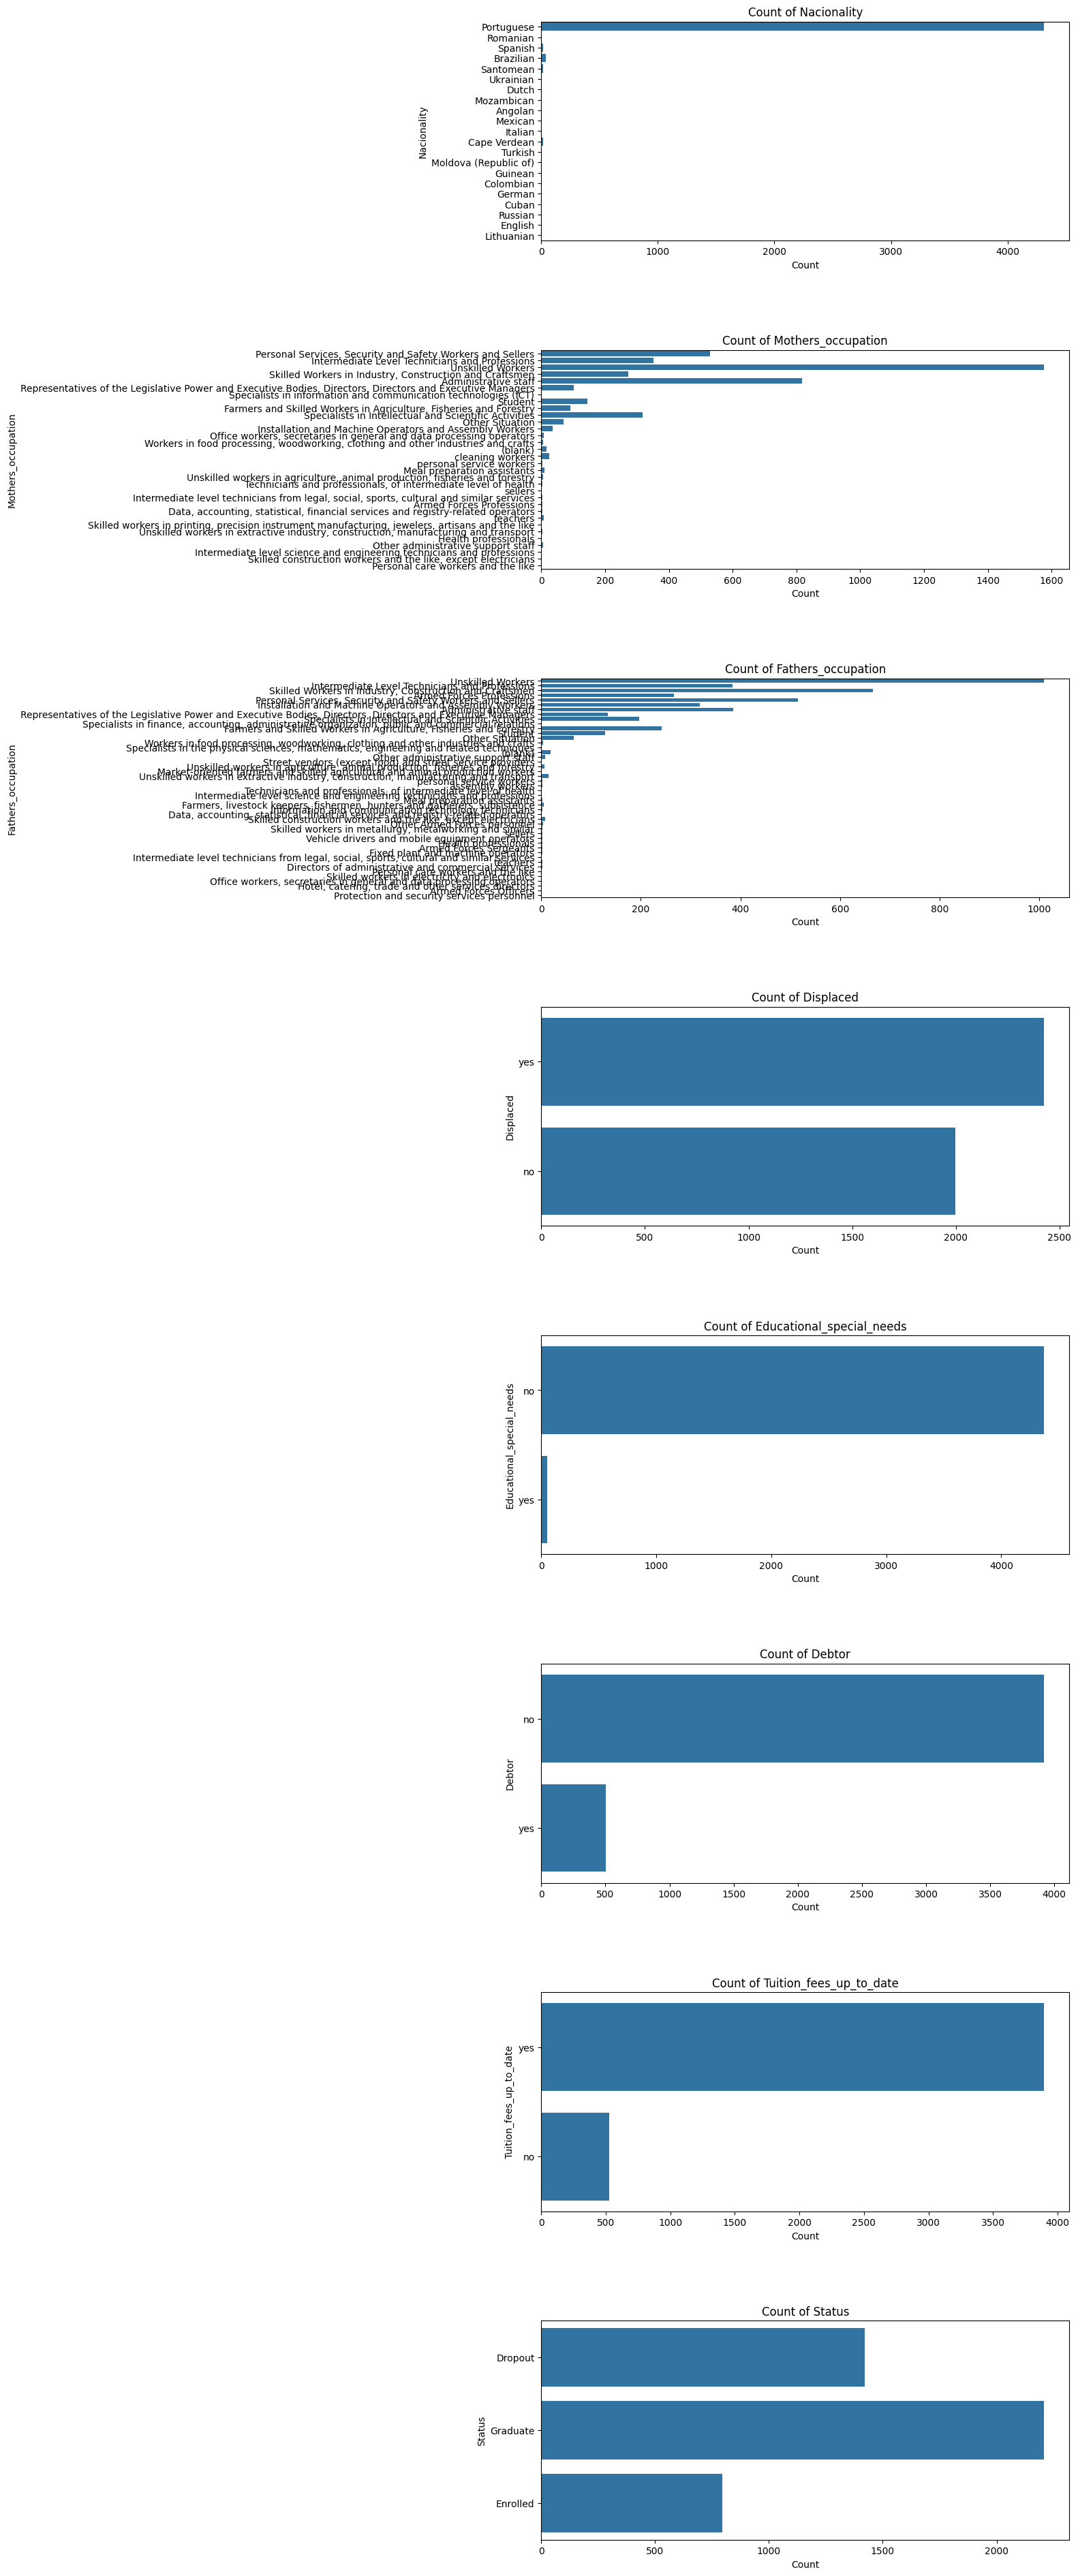

In [ ]:
plt.figure(figsize=(10, 8))

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10, 6 * len(categorical_columns)))

for i, feature in enumerate(categorical_columns):
    sns.countplot(data=df, y=feature, ax=ax[i])
    ax[i].set_ylabel(feature)
    ax[i].set_xlabel('Count')
    ax[i].set_title(f'Count of {feature}')

plt.subplots_adjust(hspace=0.5)

plt.show()


Pada kode ini, saya ingin melihat sebaran data dari tiap kolom kategorial agar dapat lebih mudah dalam menganalisis tiap featurenya secara visualisasi


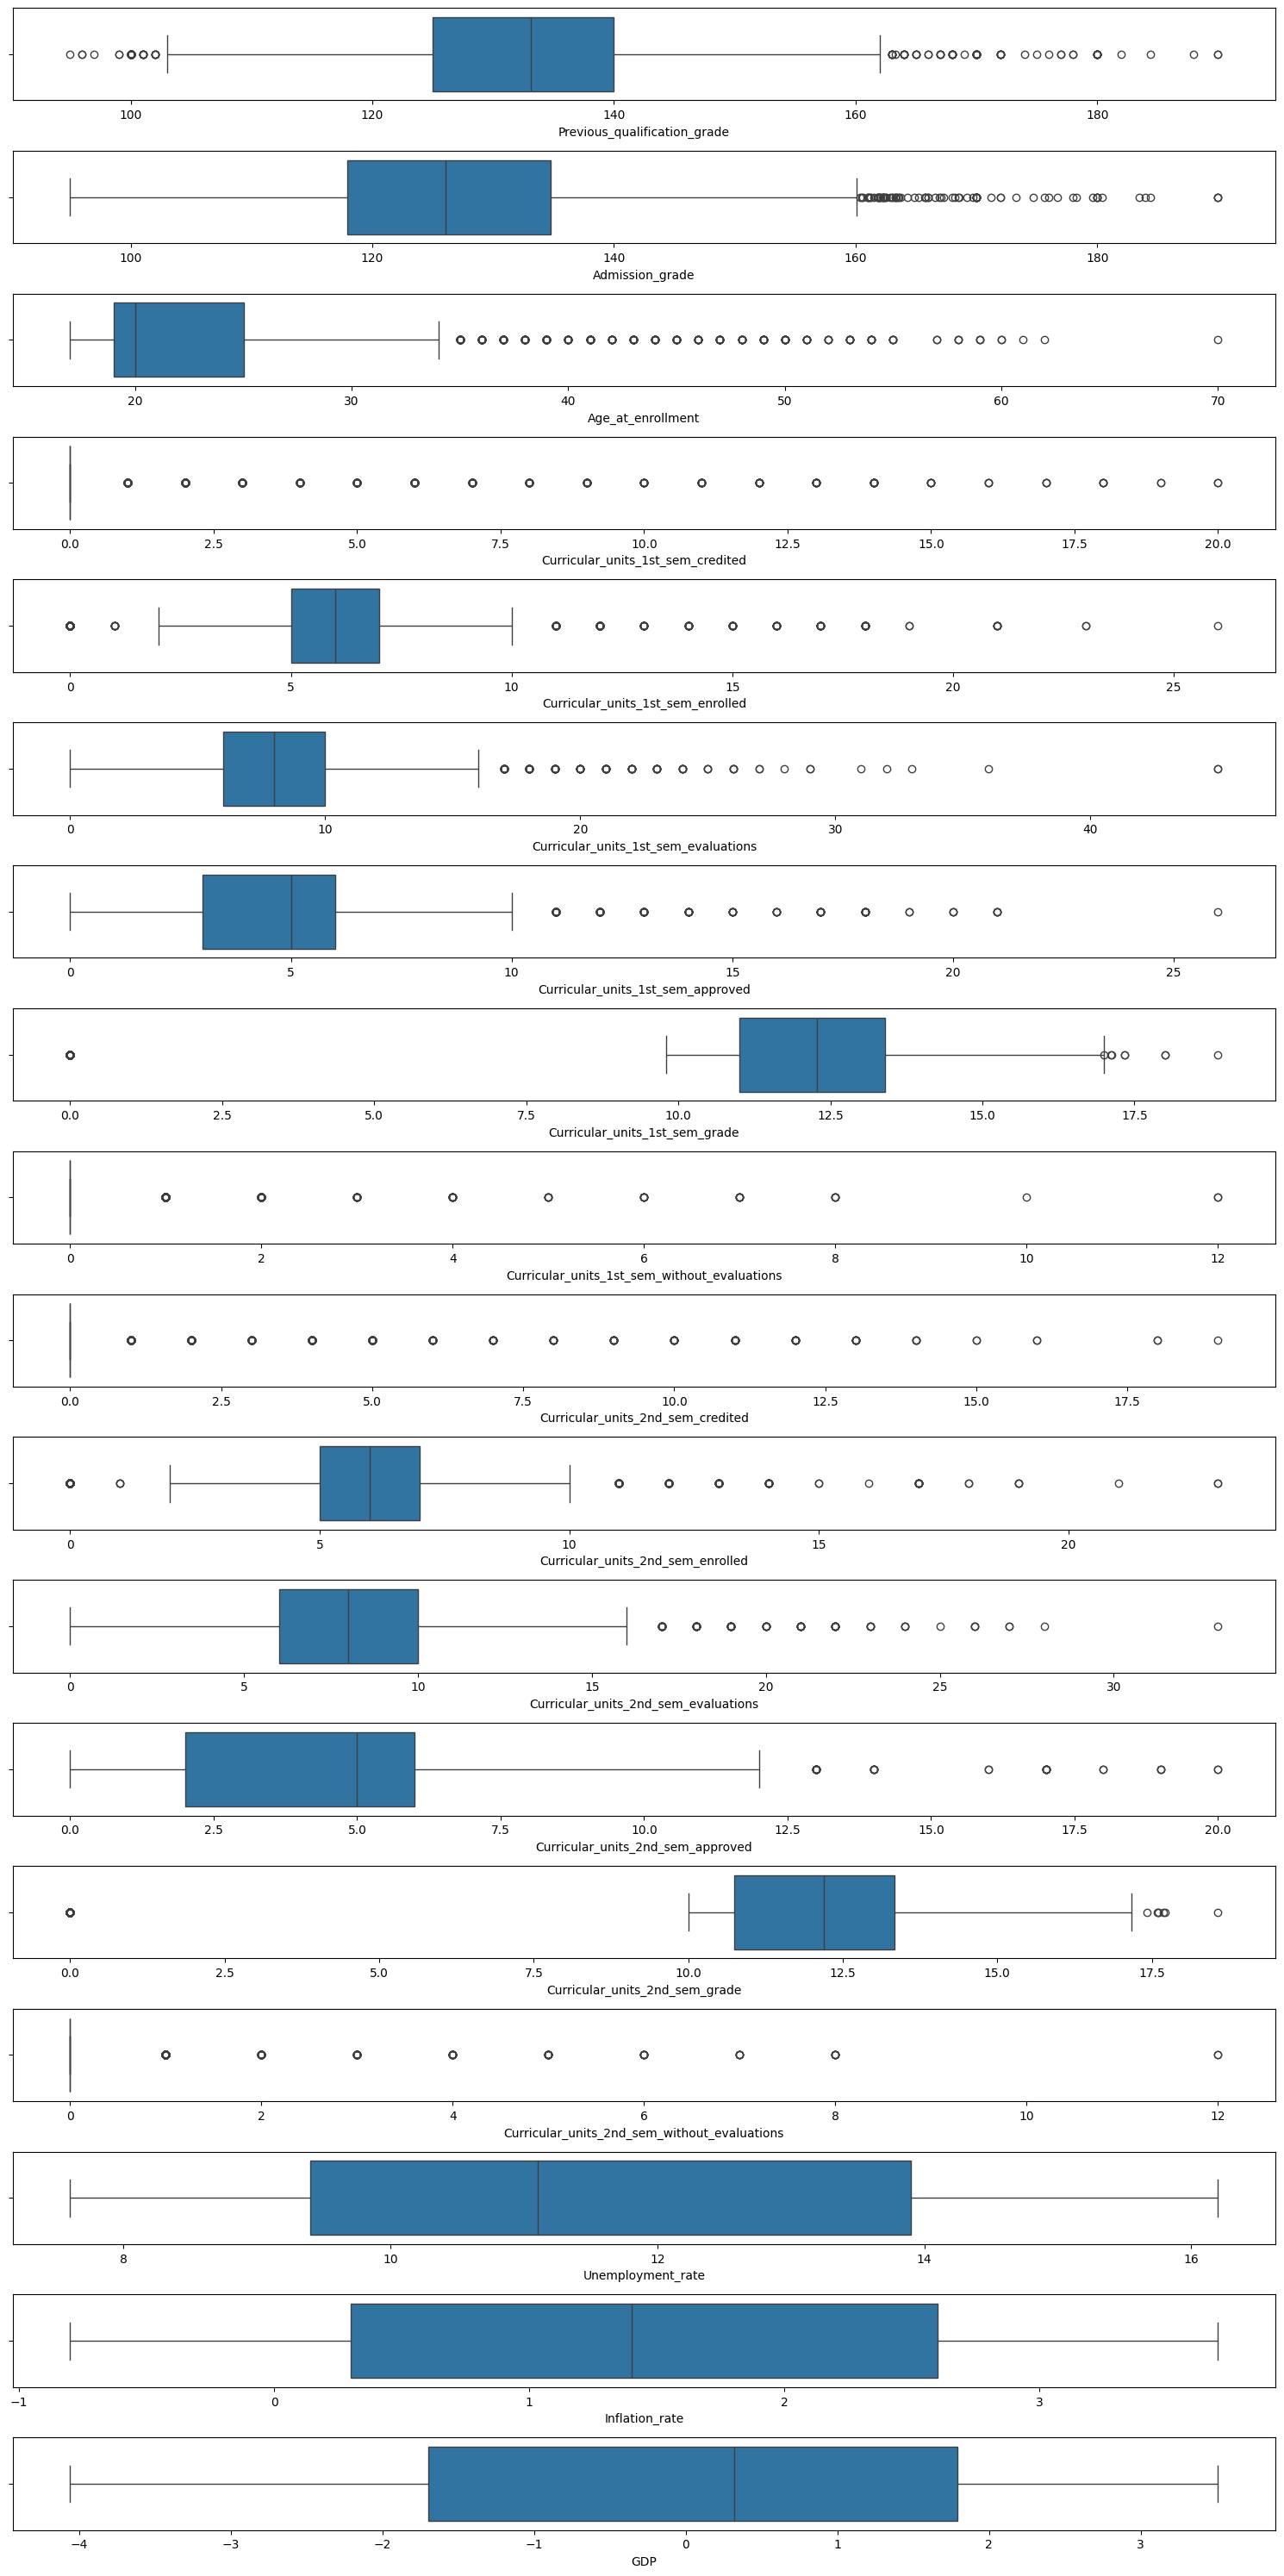

In [ ]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=df
)

Jika tadi saya menggunakan kode untuk melihat persebaran data kategori, pada kode kali ini, saya akan melihat persebaran dari data numerik yang di tampilkan menggunakan grafik boxplot.

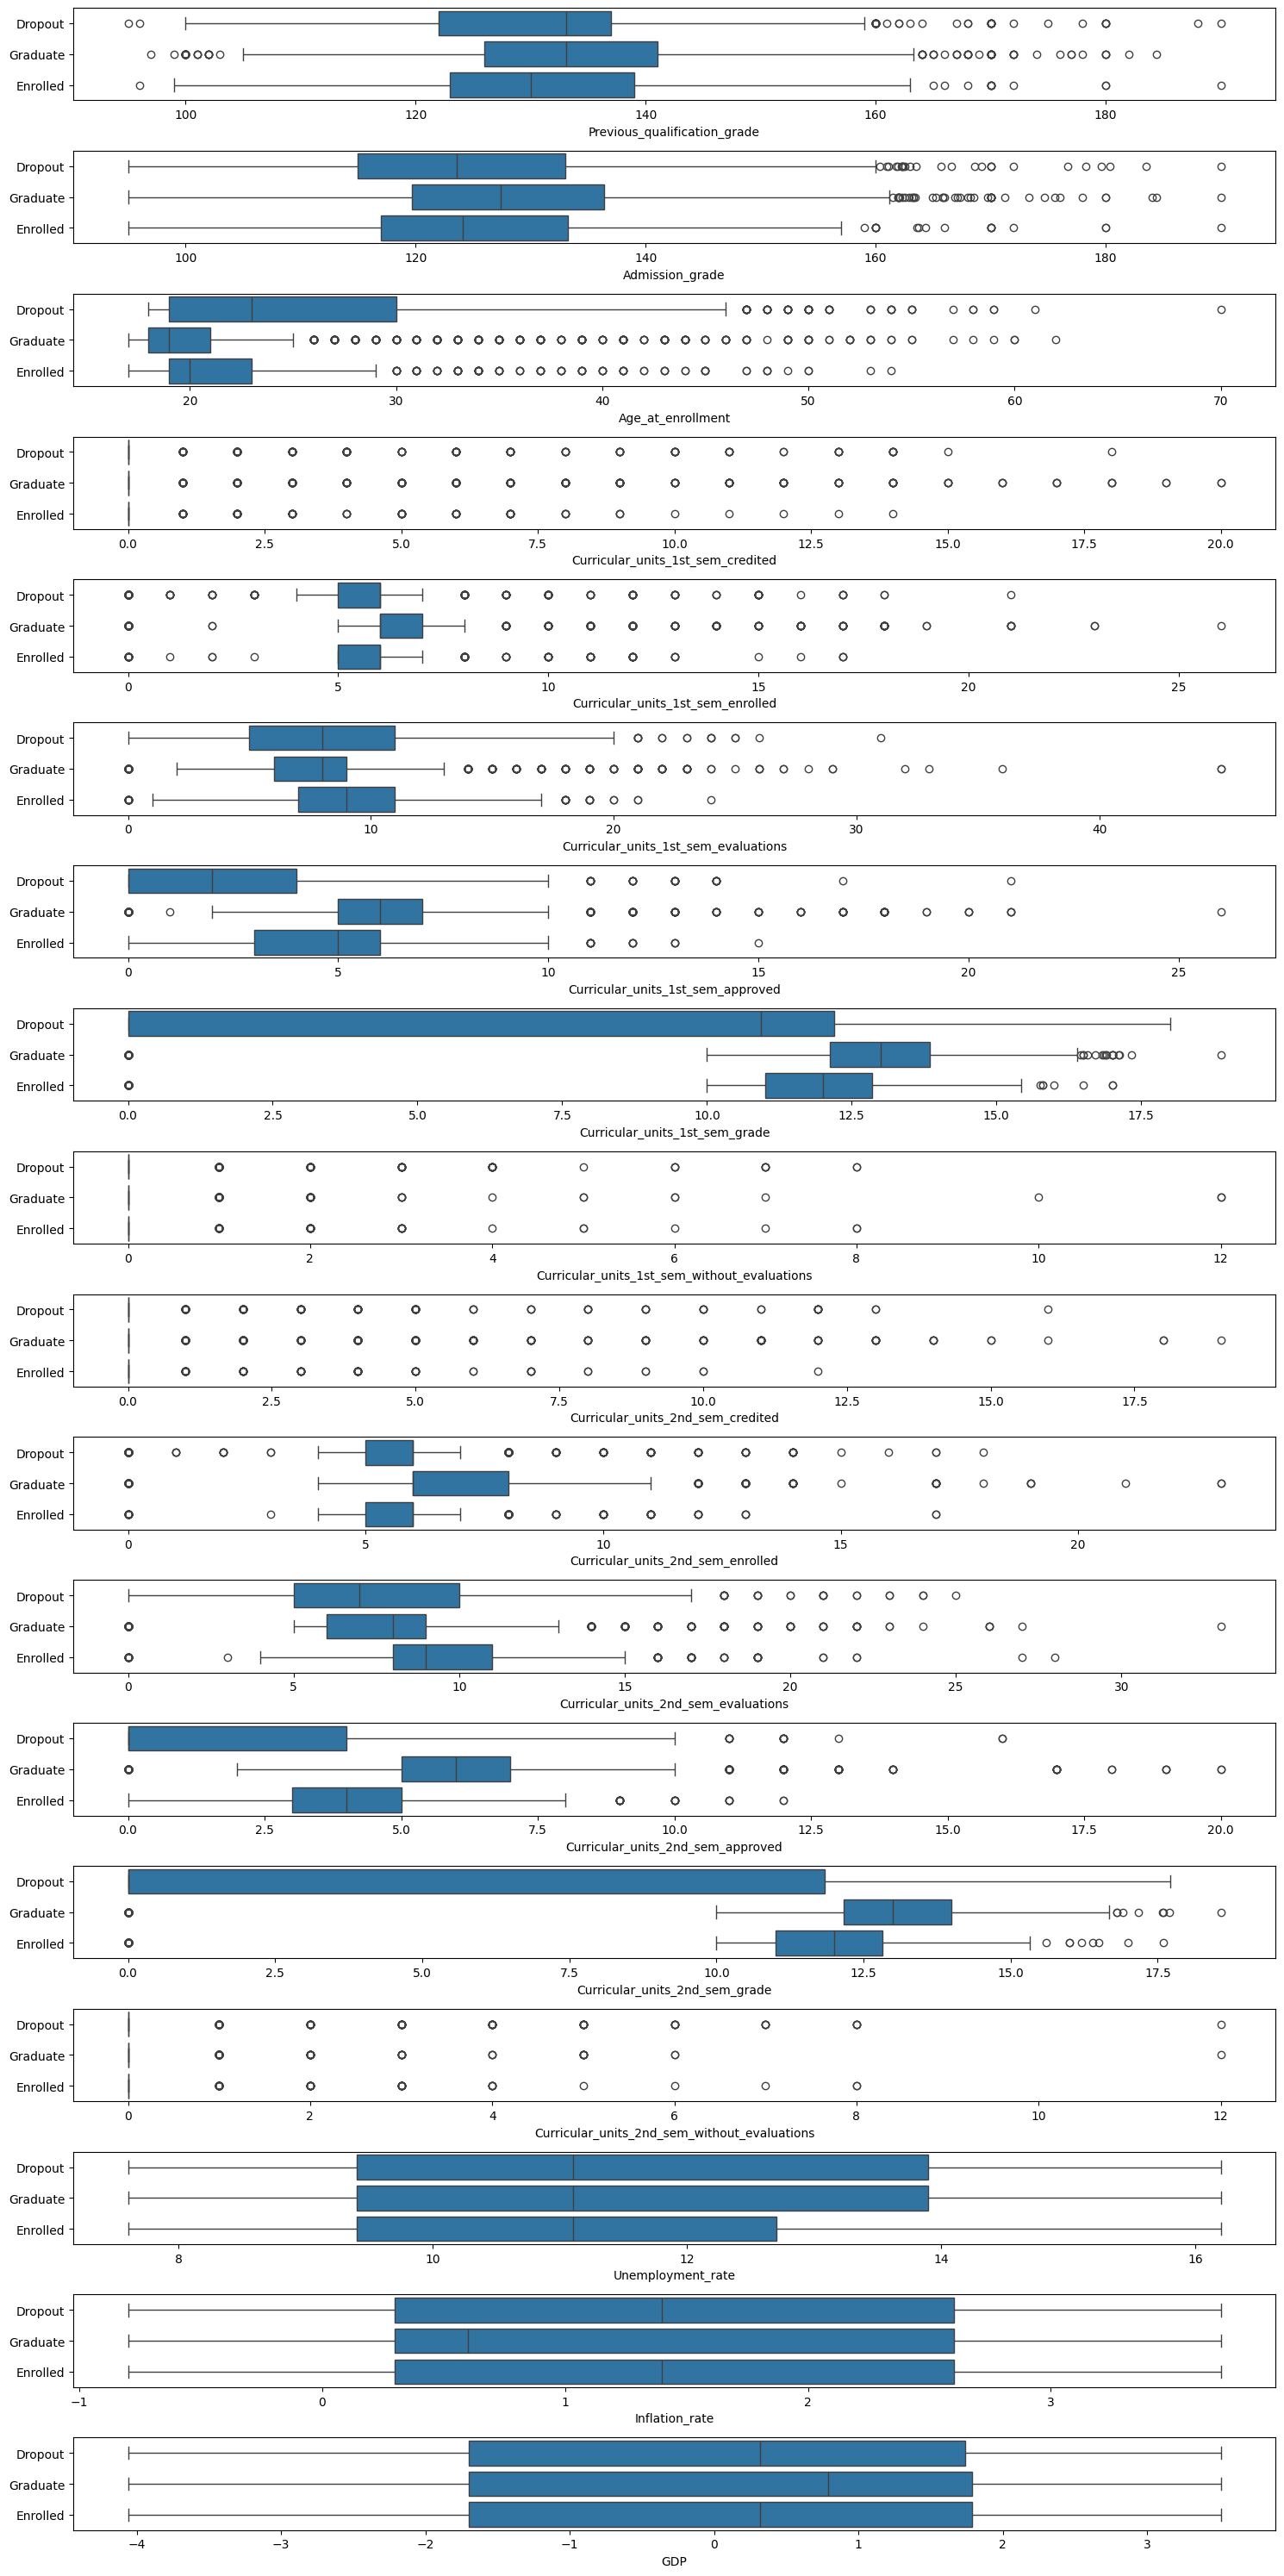

In [ ]:
numerical_dis_plot(
    features=numerical_columns,
    df=df,
    segment_feature="Status"
)

Disini, untuk kolom kategori, saya ingin mengetahui persebaran yang data berdasarkan Dropout, Graduate, dan Enrolled dari kolom kategori menggunakan grafik Boxplot

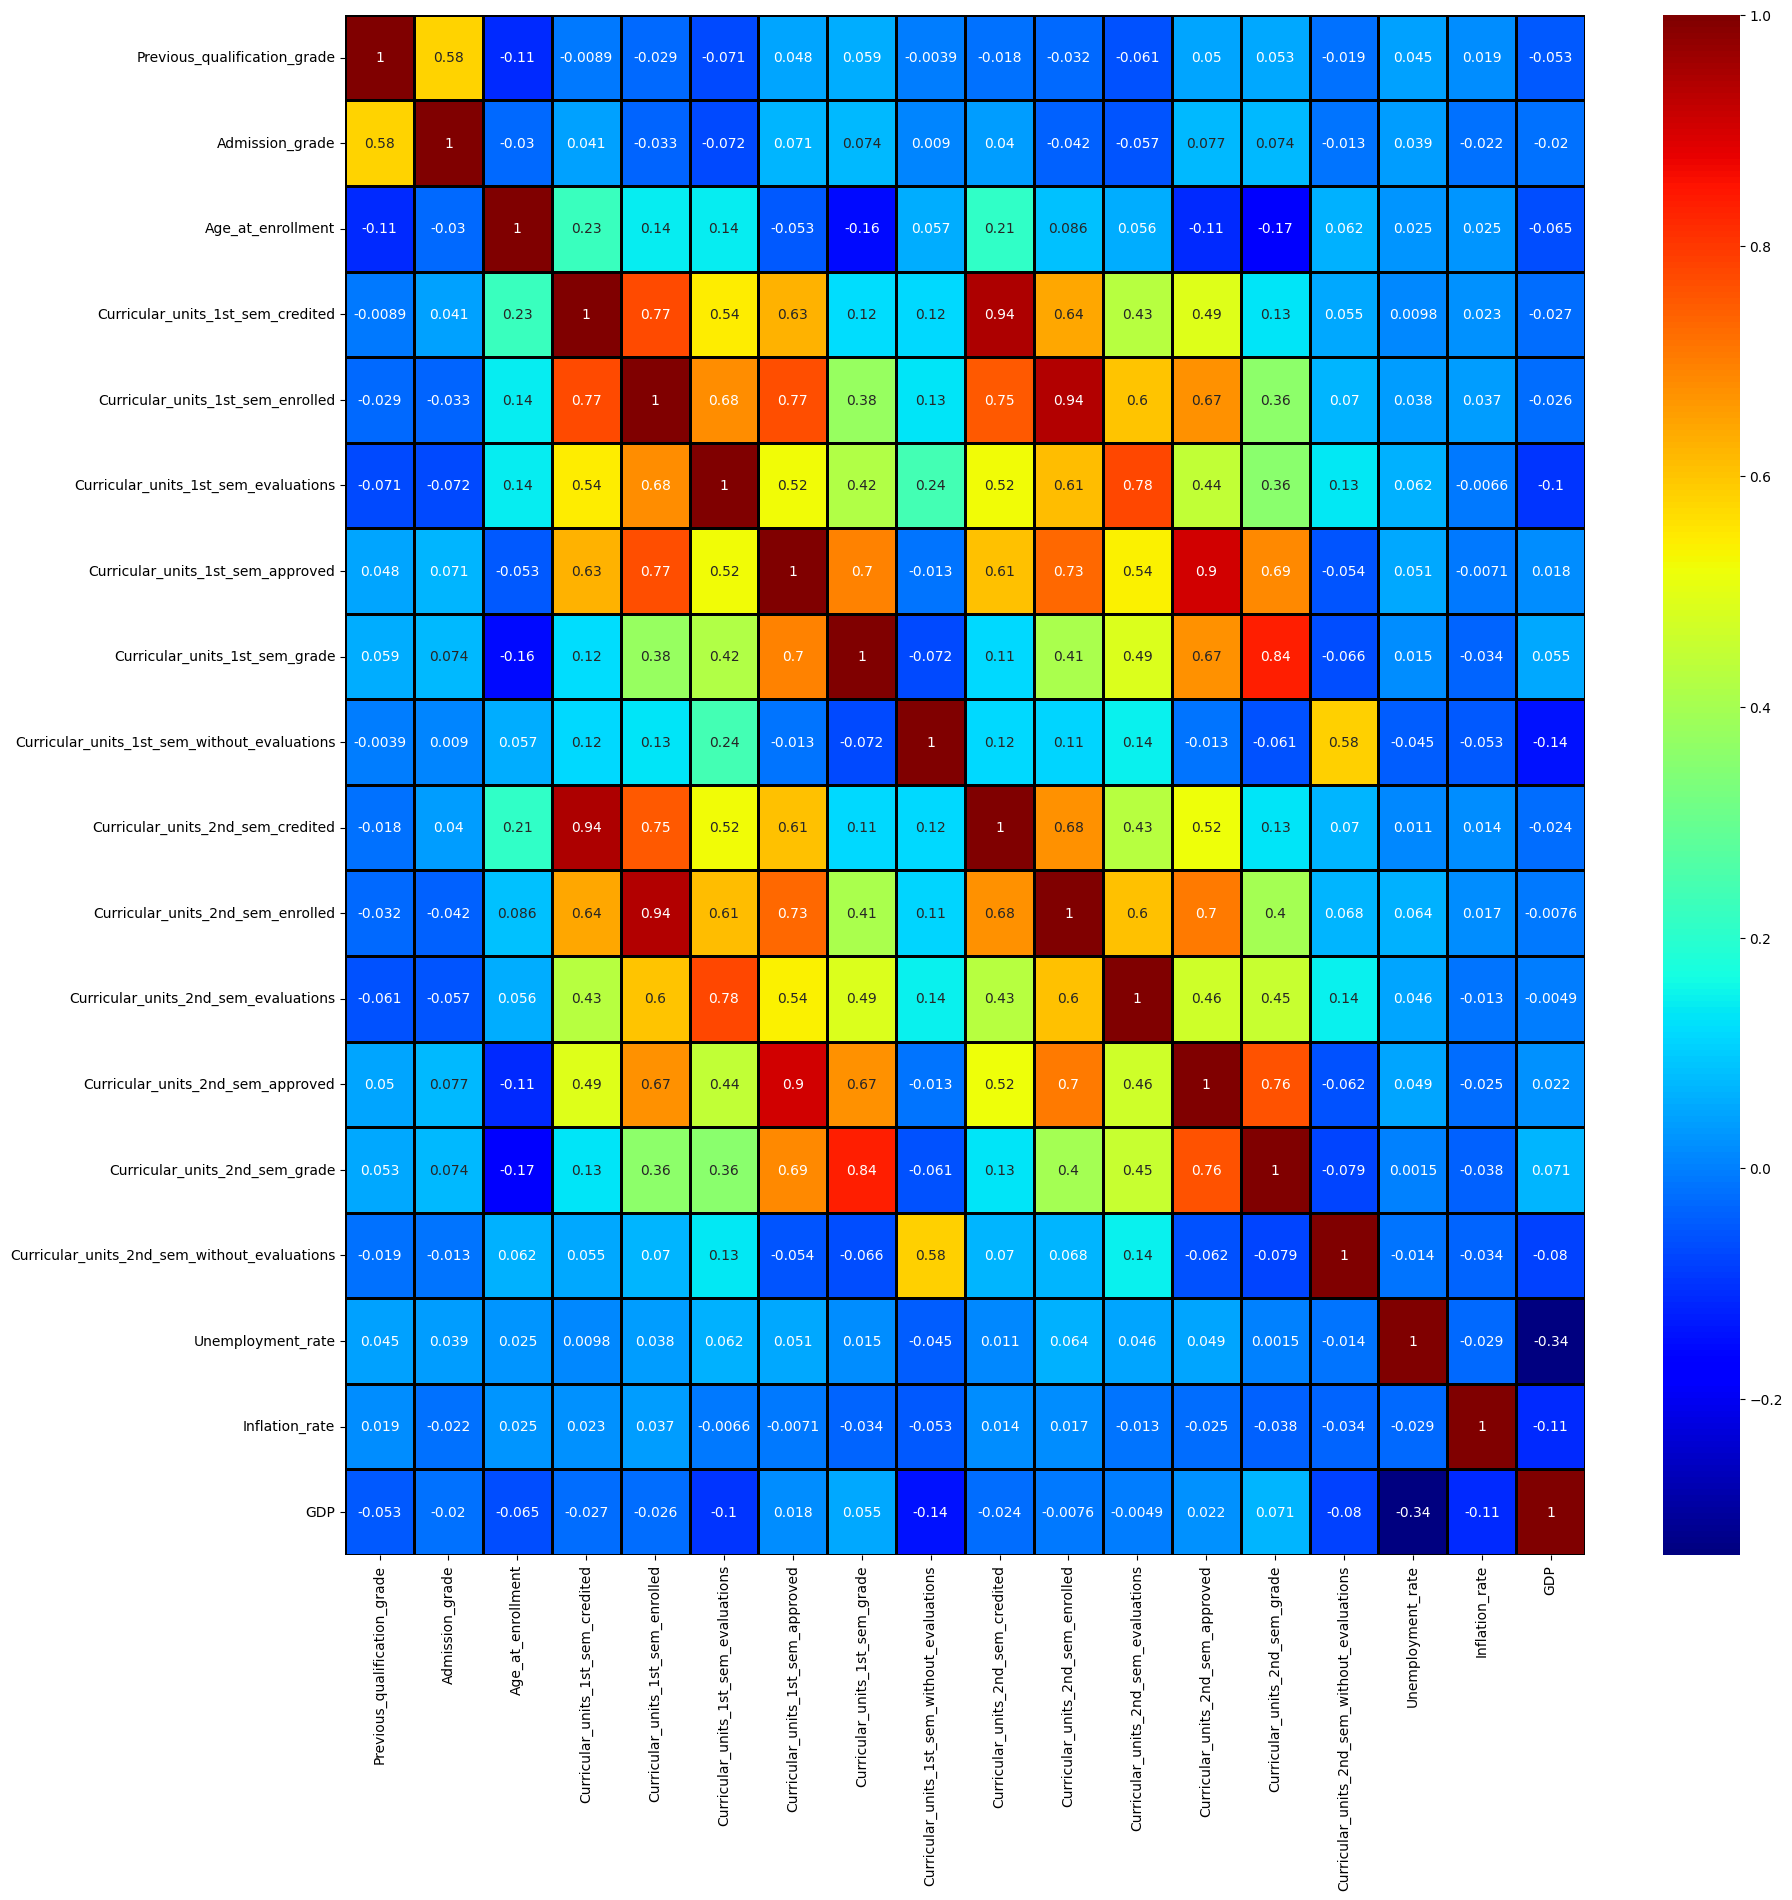

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

Disini melihat hubungan antara feature-feature numerik yang nantinya bisa digunakan untuk melakukan penentuan kolom mana yang akan ikut ke dalam model prediksi yang akan dibuat dengan menggunakan heatmap.


<Figure size 1400x800 with 0 Axes>

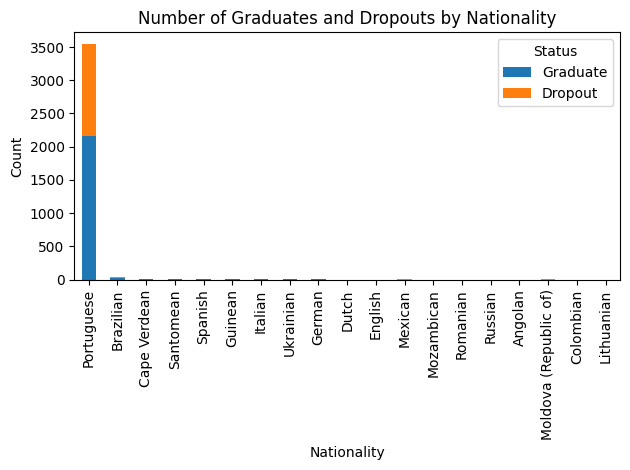

In [ ]:
graduate_counts = df[df['Status'] == 'Graduate']['Nacionality'].value_counts()
dropout_counts = df[df['Status'] == 'Dropout']['Nacionality'].value_counts()

counts_df = pd.DataFrame({
    'Graduate': graduate_counts,
    'Dropout': dropout_counts
}).fillna(0)

plt.figure(figsize=(14, 8))
counts_df.sort_values(by='Graduate', ascending=False).plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Number of Graduates and Dropouts by Nationality')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Pada kolom nationality, bisa dilihat bahwa portugese adalah negara dengan siswa yang paling banyak, namun mereka jugalah yang memiliki tingkat dropout paling besar

In [ ]:
print(df.columns)

Index(['Marital_status', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', '

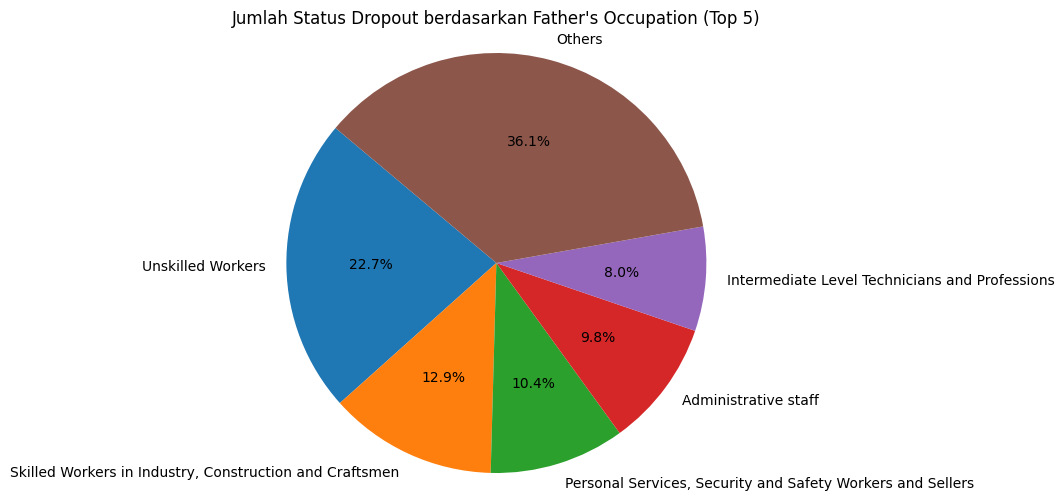

In [ ]:
father_occupation_dropout_count = df[df['Status'] == 'Dropout'].groupby('Fathers_occupation').size().sort_values(ascending=False)

top_5_father_occupation = father_occupation_dropout_count.head(5)

others_count = father_occupation_dropout_count.iloc[5:].sum()

top_5_father_occupation = pd.concat([top_5_father_occupation, pd.Series({'Others': others_count})])

father_occupation = top_5_father_occupation.index
dropout_count = top_5_father_occupation.values

plt.figure(figsize=(10, 6))
plt.pie(dropout_count, labels=father_occupation, autopct='%1.1f%%', startangle=140)
plt.title('Jumlah Status Dropout berdasarkan Father\'s Occupation (Top 5)')
plt.axis('equal')  # Agar diagram lingkaran berbentuk lingkaran sempurna
plt.show()


Selain nationality, saya juga menganalisis Father's Occupation untuk melihat pekerjaan sesuai dengan dropoutnya. Karena, pekerjaan ayah pastinya akan berpengaruh kepada tingkat dropout mahasiswa.

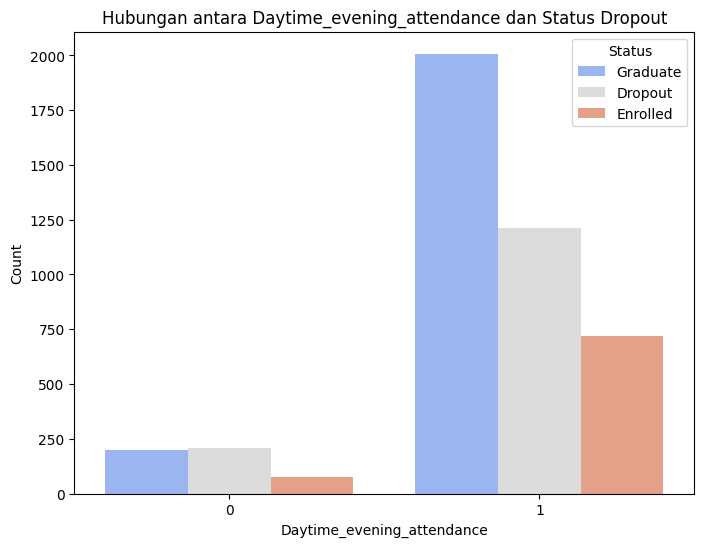

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Daytime_evening_attendance', hue='Status', palette='coolwarm')
plt.title('Hubungan antara Daytime_evening_attendance dan Status Dropout')
plt.xlabel('Daytime_evening_attendance')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.show()



Bisa dilihat, bawa tingkat dropout yang paling tinggi terdapat pada waktu daytime (siang hari) bukan pada kualiha malam. Hal ini juga dikarenakan jumlah mahasiswa yang masuk juga lebih banyak pada waktu siang hari.

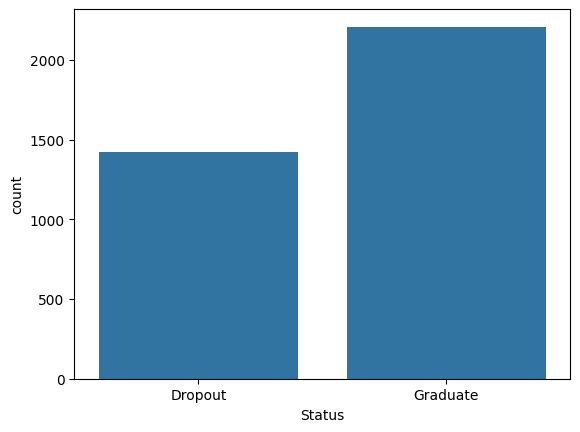

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


In [ ]:
df = df[df['Status'].isin(['Graduate', 'Dropout'])]
sns.countplot(data=df, x="Status")
plt.show()
status_counts = df['Status'].value_counts()
print(status_counts)

Karena Saya hanya mau memmbuat permodelan antara Dropout dan Graduate, maka saya hanya mengambil kolom Status yang memiliki nilai "Dropout" dan "Graduate" saja

## Data Preparation/Preprocessing


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3448, 36)
(182, 36)


Saya membagi test_size sebanyak 0.05 atau 5% dari data untuk model prediksi nantinya.

In [ ]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_minority = train_df[(train_df.Status == "Dropout")]

In [ ]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=2209, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2209, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_minority.shape)

(2209, 36)
(1341, 36)


Saya melakukan resample data dengan menerapkan metode Oversampled, dimana saya akan membuat df_minority akan sebanyak df_majority_1. Oversampled dipilih karena data kita menggunakan data kategori, sehingga jika dilakukannya undersampled maka akan terjadi pengurangan informasi pada data.

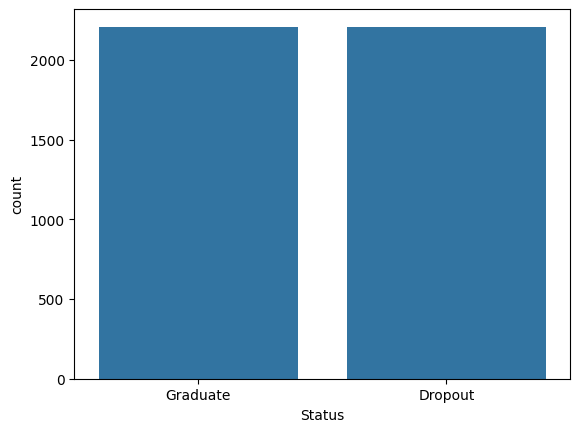

In [ ]:
from sklearn.utils import shuffle

oversampled_train_df = pd.concat([df_majority_1_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)
sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

Sekarang data minoritas dan mayoritas memiliki ukuran yang sama yaitu sebanyak 2209 data.

In [ ]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]


Pembagian X_train, X_text, y_train, dan y_test yang nantinya akan digunakan pada model prediksi.

## Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.9120879120879121
              precision    recall  f1-score   support

     Dropout       0.92      0.88      0.90        80
    Graduate       0.91      0.94      0.92       102

    accuracy                           0.91       182
   macro avg       0.91      0.91      0.91       182
weighted avg       0.91      0.91      0.91       182

Feature Importance:
 Curricular_units_2nd_sem_approved       0.164676
Curricular_units_1st_sem_approved       0.112456
Curricular_units_2nd_sem_grade          0.107279
Curricular_units_1st_sem_grade          0.080970
Tuition_fees_up_to_date_yes             0.047690
Curricular_units_2nd_sem_evaluations    0.038563
Age_at_enrollment                       0.035550
Admission_grade                         0.031865
Curricular_units_1st_sem_evaluations    0.029077
Previous_qualification_grade            0.024901
Scholarship_holder                      0.024367
Debtor_yes                              0.017985
Curricular_units_1st_sem_enrolled  

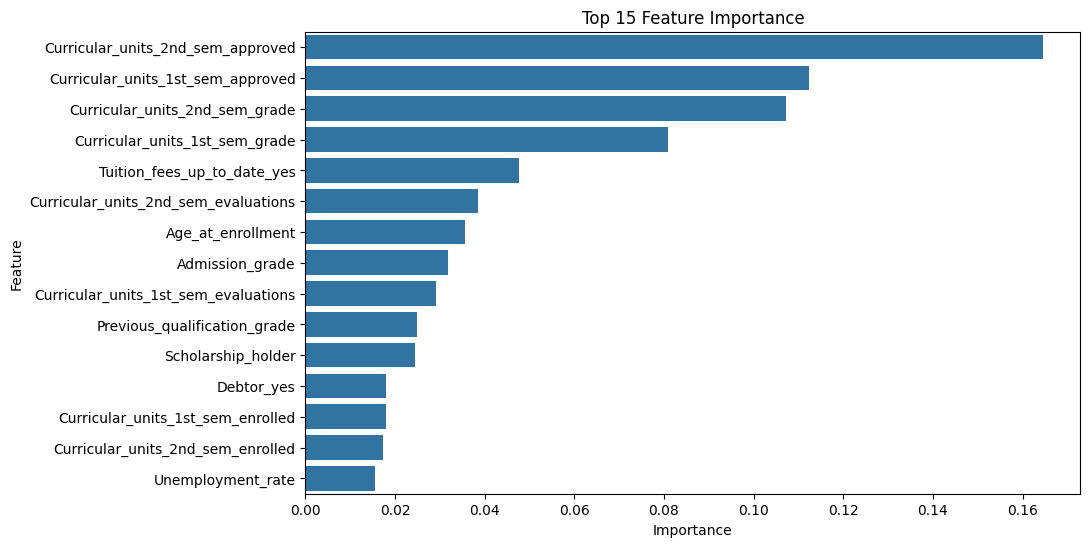

In [ ]:
categorical_features = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

X_train = pd.concat([X_train.drop(columns=categorical_features).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features).reset_index(drop=True), X_test_encoded], axis=1)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance.head(15))

top_15_features = feature_importance.head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_features, y=top_15_features.index)
plt.title("Top 15 Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Dari data ini, bisa kita lihat bahwa terdapat 15 feature yang paling paling mempengaruhi apakah mahasiswa akan mengalami dropout atau tidak. 15 Feature ini akan menjadi kolom-kolom yang digunakan untuk model prediksi kita nanti, sehingga model prediksi akan memiliki akurasi yang tinggi.

In [ ]:
columns_to_keep = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Age_at_enrollment',
    'Curricular_units_2nd_sem_evaluations',
    'Admission_grade',
    'Curricular_units_1st_sem_evaluations',
    'Previous_qualification_grade',
    'Scholarship_holder',
    'Curricular_units_2nd_sem_enrolled',
    'Debtor',
    'Curricular_units_1st_sem_enrolled',
    'GDP',
    'Status'  # Ensure Status is included to filter and split data
]


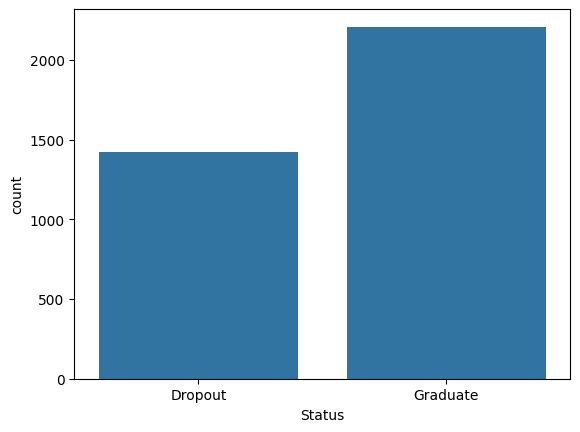

Train set shape: (3448, 16)
Test set shape: (182, 16)
Oversampled majority shape: (2209, 16)
Oversampled minority shape: (2209, 16)


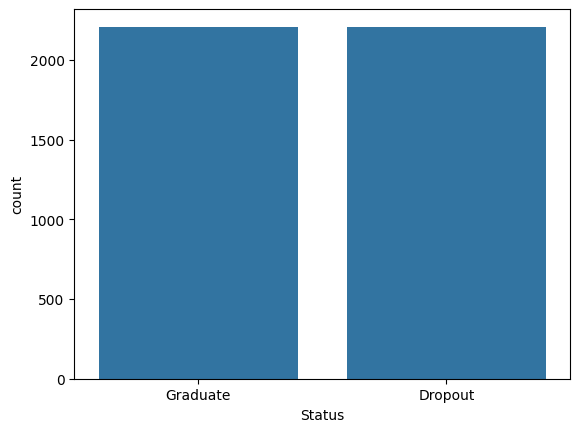

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy: 0.8901098901098901
              precision    recall  f1-score   support

     Dropout       0.87      0.89      0.88        80
    Graduate       0.91      0.89      0.90       102

    accuracy                           0.89       182
   macro avg       0.89      0.89      0.89       182
weighted avg       0.89      0.89      0.89       182



In [ ]:
df = df[columns_to_keep]
df = df[df['Status'].isin(['Graduate', 'Dropout'])]
sns.countplot(data=df, x="Status")
plt.show()

train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

df_majority_1 = train_df[train_df.Status == "Graduate"]
df_minority = train_df[train_df.Status == "Dropout"]

df_majority_1_undersampled = resample(df_majority_1, n_samples=2209, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=2209, random_state=42)

print("Oversampled majority shape:", df_majority_1_undersampled.shape)
print("Oversampled minority shape:", df_minority_undersampled.shape)

oversampled_train_df = pd.concat([df_majority_1_undersampled, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42).reset_index(drop=True)

sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

binary_features = ['Tuition_fees_up_to_date', 'Debtor']
for feature in binary_features:
    X_train[feature] = X_train[feature].map({'yes': 1, 'no': 0})
    X_test[feature] = X_test[feature].map({'yes': 1, 'no': 0})

categorical_features = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

joblib.dump(encoder, 'encoder.joblib')

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

X_train = pd.concat([X_train.drop(columns=categorical_features).reset_index(drop=True), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_features).reset_index(drop=True), X_test_encoded], axis=1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

ensemble_model = VotingClassifier(estimators=[('rf', best_rf), ('gb', gb)], voting='soft')
ensemble_model.fit(X_train, y_train)

joblib.dump(ensemble_model, 'dropout_prediction_model_ensemble.joblib')

y_pred = ensemble_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Pada permodelan ini, saya menggunakan filterisasi untuk hanya beberapa kolom yang sudah ditentukan menggunakan machine learning sebelumnya, lalu saya akan melakukan pembagian lagi untuk data train dan test sesuai dengan data kolom tertentu. Kemudian, saya gunakan balancing data dengan menggunakan metode Oversampling kembali untuk data yang menyesuaikan kolom yang diinginkan.

Kemudian selanjutnya akan saya lakukan OneHotDecoder untuk melakukan encoder pada kolom-kolom, dimana model machine learning yang pertama kali saya gunakan adalah model machine learning RandomForest. Kemudian, setelah di prediksi menggunakan RandomForest,  Saya menggunakan GridSearchCV untuk mencari parameter terbaik (Hyperparameter Tuning).

Selanjutnya, saya menambahkan model lain, yaitu GradientBoostingClassifier untuk meningkatkan variasi dalam ensembel. Lalu, dari sini saya menggabungkan beberapa model menggunakan VotingClassifier untuk strategi yang bagus untuk meningkatkan performa prediksi. Lalu, saya menyimpan model terbaik dengan menggunakan joblib.

## Evaluation

In [ ]:
import pandas as pd
import joblib

model = joblib.load('dropout_prediction_model_ensemble.joblib')
encoder = joblib.load('encoder.joblib')

new_data = pd.DataFrame({
    'Curricular_units_2nd_sem_approved': [0],
    'Curricular_units_2nd_sem_grade': [0],
    'Curricular_units_1st_sem_approved': [0],
    'Curricular_units_1st_sem_grade': [0],
    'Tuition_fees_up_to_date': ['yes'],
    'Age_at_enrollment': [20],
    'Curricular_units_2nd_sem_evaluations': [0],
    'Admission_grade': [122.00],
    'Curricular_units_1st_sem_evaluations': [0],
    'Previous_qualification_grade': [120.00],
    'Scholarship_holder': ['yes'],
    'Curricular_units_2nd_sem_enrolled': [0],
    'Debtor': ['yes'],
    'Curricular_units_1st_sem_enrolled': [0],
    'GDP': [0.5]
})

binary_features = ['Tuition_fees_up_to_date', 'Debtor', 'Scholarship_holder']
for feature in binary_features:
    new_data[feature] = new_data[feature].map({'yes': 1, 'no': 0})

categorical_features = new_data.select_dtypes(include=['object']).columns
new_data_encoded = encoder.transform(new_data[categorical_features])
new_data_encoded = pd.DataFrame(new_data_encoded, columns=encoder.get_feature_names_out(categorical_features))

new_data_processed = pd.concat([new_data.drop(columns=categorical_features).reset_index(drop=True), new_data_encoded], axis=1)

prediction = model.predict(new_data_processed)
prediction_proba = model.predict_proba(new_data_processed)

print("Prediksi:", prediction[0])
print("Probabilitas:", prediction_proba[0])


Prediksi: Dropout
Probabilitas: [0.68710403 0.31289597]


Disini, saya mengecek bagaimana prediksi model yang sudah disimpan dengan cara menginput data secara langsung (berdasarkan dataset) untuk melihat kebeneran dari model.

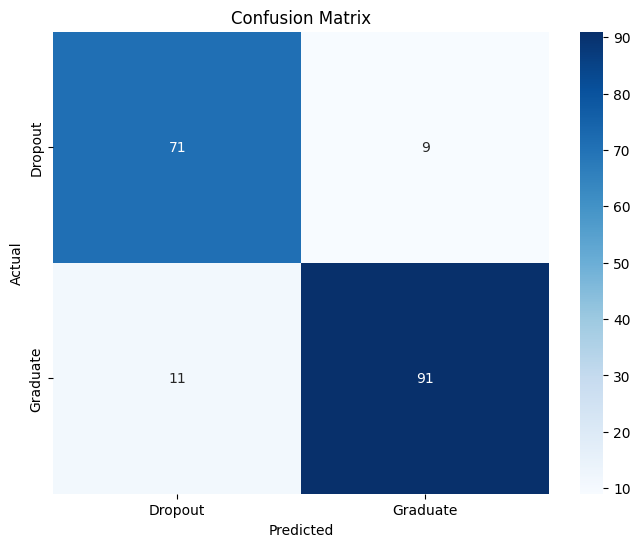

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Untuk Evaluasi, saya menggunakan Confusion Matrix untuk menilai dari setiap data yang di prediksi terhadap data actualnya.

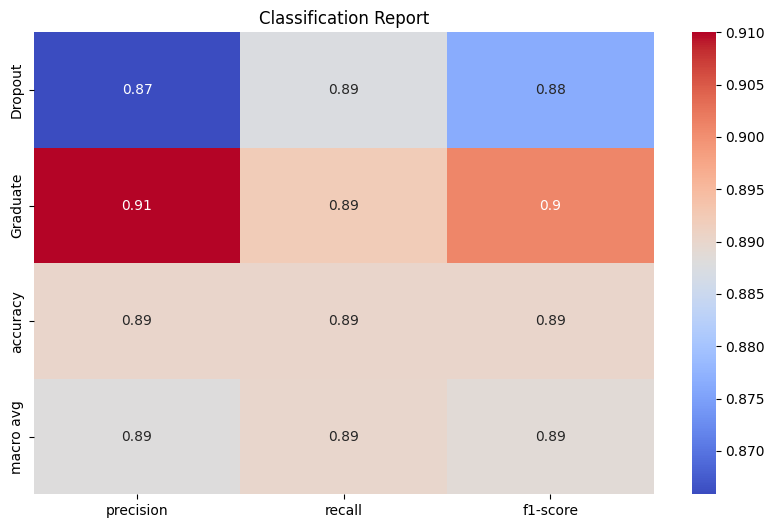

In [ ]:
report = classification_report(y_test, y_pred, target_names=['Dropout', 'Graduate'], output_dict=True)
df_report = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="coolwarm")
plt.title('Classification Report')
plt.show()

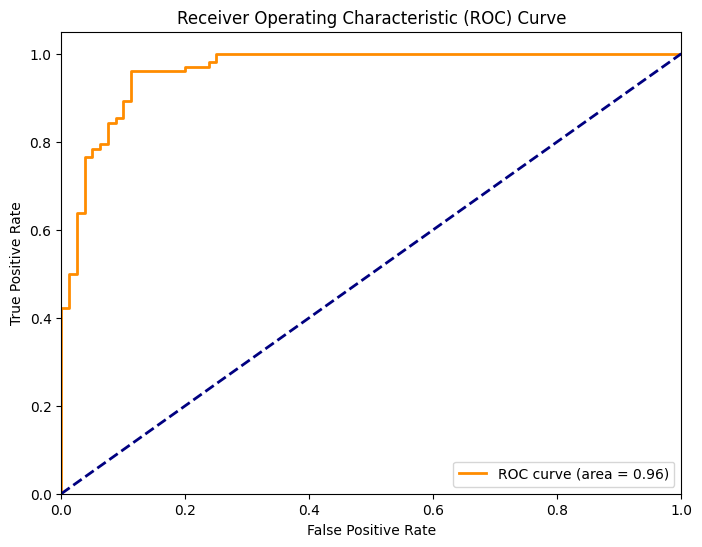

In [ ]:
# ROC Curve and AUC
y_test_binary = y_test.map({'Dropout': 0, 'Graduate': 1})
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Grafik ini menggambarkan kinerja model klasifikasi pada berbagai threshold. ROC Curve menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR).